<a href="https://colab.research.google.com/github/JaniVarga/Start/blob/main/Best_Bubble_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Thank you Daniel!  https://github.com/mrdbourkeimport tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-16eebd05-4976-c5b4-f155-50e785c4b30a)


In [ ]:
!gdown "?????????????????????????????

Downloading...
From: https://drive.google.com/uc?id=110n2inhlftM58MIX6i1X5YHpn3mkXMtJ
To: /content/bubbi.zip
100% 1.55G/1.55G [00:49<00:00, 31.1MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/bubbi.zip', 'r') as myzip:
    myzip.extractall("Bubbi")

In [ ]:
# Delete the zip file
!rm -rf "/content/bubbi.zip"

In [ ]:
input_shape = (512, 512, 3)

In [ ]:
train_dir = "/content/Bubbi/bubbi/train"
test_dir =  "/content/Bubbi/bubbi/test"

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=(512, 512),
                                                                 label_mode="binary",
                                                                 )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=(512, 512),
                                                                 label_mode="binary",
                                                                 shuffle=False # don't shuffle test data for prediction analysis
)

Found 2048 files belonging to 2 classes.
Found 606 files belonging to 2 classes.


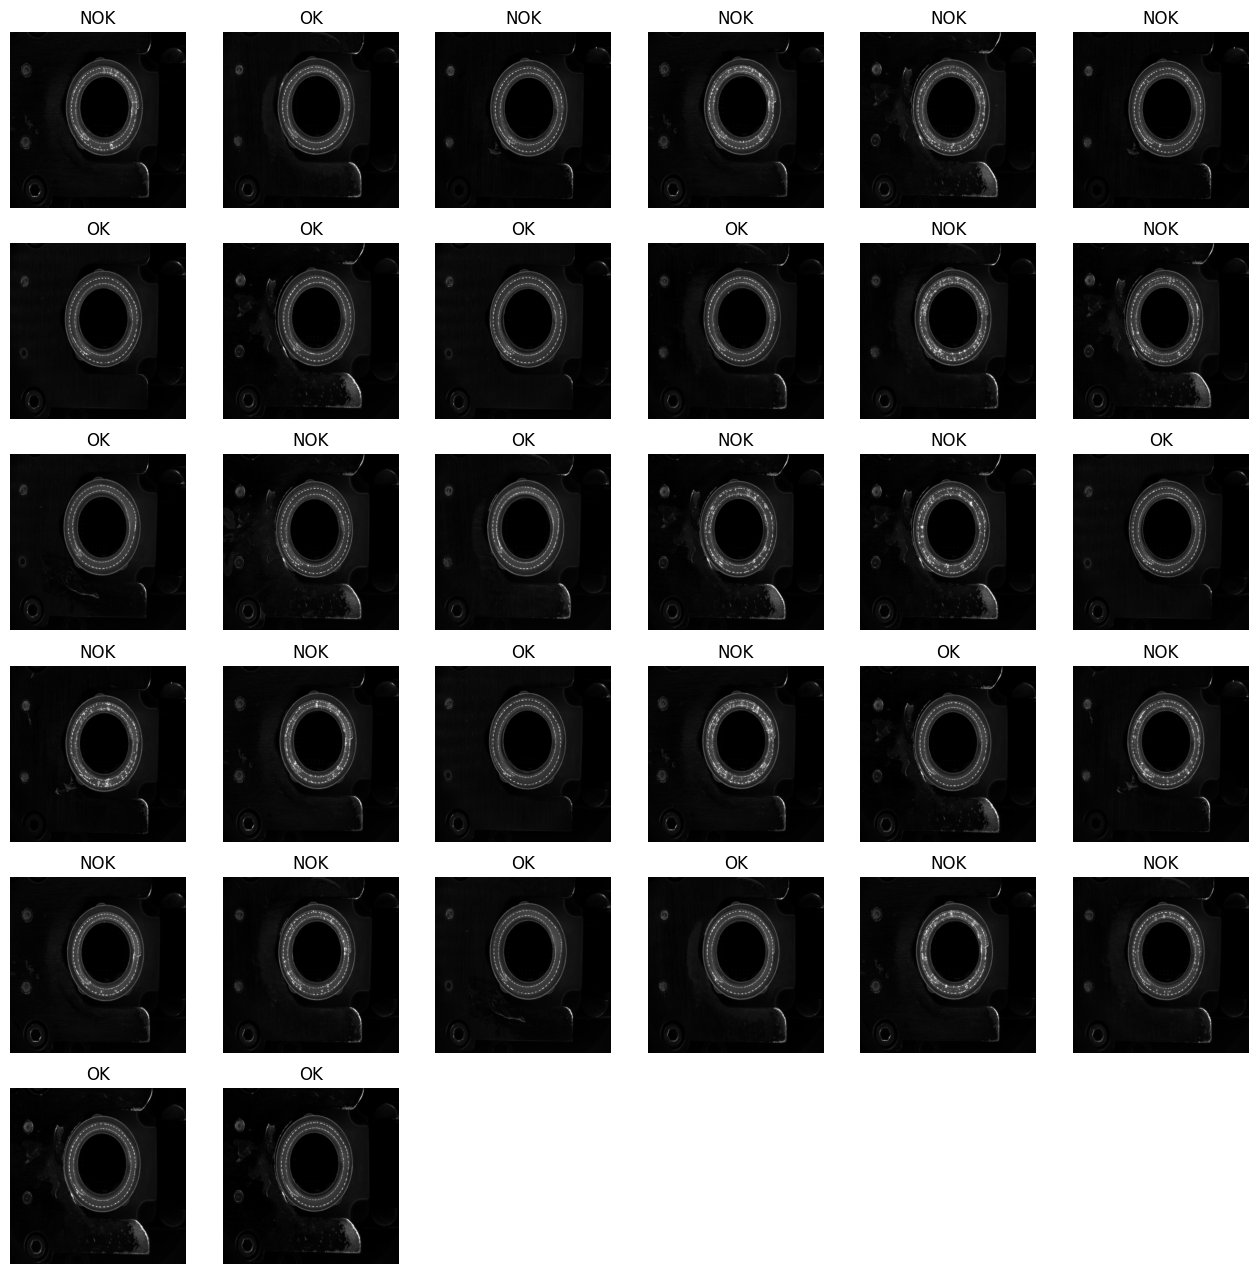

In [ ]:
plt.figure(figsize=(16, 16))
class_names = test_data.class_names

for image,labels in train_data.take(1): # list one batch from the all which contain 32 image  and 32 label in one tuple. ([image,image,..image],[label,label,...label])
  for i in range(len(image)):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    if labels[i] == 0:
      plt.title("NOK")
    else:
      plt.title("OK")
    plt.axis("off")

In [ ]:
# Create the model
model = tf.keras.models.Sequential()
model.add(layers.Input(shape=input_shape, name="input layer"))
model.add(layers.Cropping2D(cropping=((32, 32))))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d (Cropping2D)     (None, 448, 448, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 448, 448, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 446, 446, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 223, 223, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 221, 221, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                    

In [ ]:
# Fit data to model

initial_epoch = 50

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=5) # if val loss decreases for 3 epochs in a row, stop training

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

save_checkpoints = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/checpoints.chkp",
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=1)

model_history =model.fit(train_data,
          epochs=initial_epoch,
          validation_data=test_data,
          validation_steps=len(test_data),
          callbacks = [early_stopping, reduce_lr, save_checkpoints]
)

Epoch 1/50
64/64 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5142
Epoch 1: val_accuracy improved from -inf to 0.40924, saving model to checkpoint/checpoints.chkp
64/64 [==============================] - 52s 547ms/step - loss: 0.6924 - accuracy: 0.5142 - val_loss: 0.6950 - val_accuracy: 0.4092 - lr: 0.0010
Epoch 2/50
64/64 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.5713
Epoch 2: val_accuracy improved from 0.40924 to 0.72112, saving model to checkpoint/checpoints.chkp
64/64 [==============================] - 40s 568ms/step - loss: 0.6873 - accuracy: 0.5713 - val_loss: 0.6430 - val_accuracy: 0.7211 - lr: 0.0010
Epoch 3/50
64/64 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.7686
Epoch 3: val_accuracy improved from 0.72112 to 0.84653, saving model to checkpoint/checpoints.chkp
64/64 [==============================] - 34s 479ms/step - loss: 0.4903 - accuracy: 0.7686 - val_loss: 0.4132 - val_accuracy: 0.8465 - 

In [ ]:
model.load_weights(filepath="checkpoint/checpoints.chkp")

In [ ]:
y_pred = model.evaluate(test_data)

19/19 [==============================] - 6s 335ms/step - loss: 0.1104 - accuracy: 0.9538


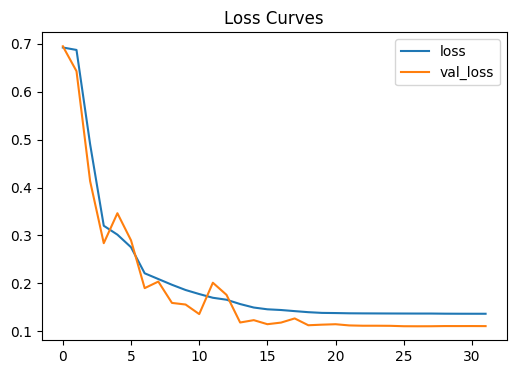

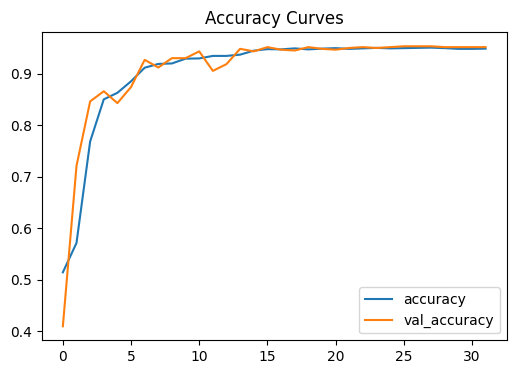

In [ ]:
# Plot the history
# Plot the curves
def plot_loss_curves(load_the_history):

  loss = load_the_history.history["loss"]
  accuracy = load_the_history.history["accuracy"]

  val_loss = load_the_history.history["val_loss"]
  val_accuracy = load_the_history.history["val_accuracy"]

  epochs=range(0, len(load_the_history.history["loss"]))

  plt.figure(figsize=(6,4))
  plt.plot(epochs, loss, label="loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.legend()
  plt.title("Loss Curves")

  plt.figure(figsize=(6,4))
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.legend()
  plt.title("Accuracy Curves")

  plt.show()

plot_loss_curves(model_history)


In [ ]:
import numpy as np

# To get our test labels we need to unravel our test_data BatchDataset
y_labels = []
for images,labels in test_data.unbatch():
  y_labels.append(np.round(labels.numpy())) # currently test labels look like : [0, 0, 1, 0, 0,...], we want to index value where the "1" occuor

print(y_labels[:10])

# Make predictions with our model
preds_probs = model.predict(test_data, verbose=1) # set verborsity to see how long is left


# Get the pred classes of each label
pred_classes = np.round(preds_probs)
print(pred_classes[:10])

[array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32)]
19/19 [==============================] - 6s 332ms/step
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred=pred_classes, y_true=y_labels)
cm

array([[332,  26],
       [  2, 246]])

<Axes: >

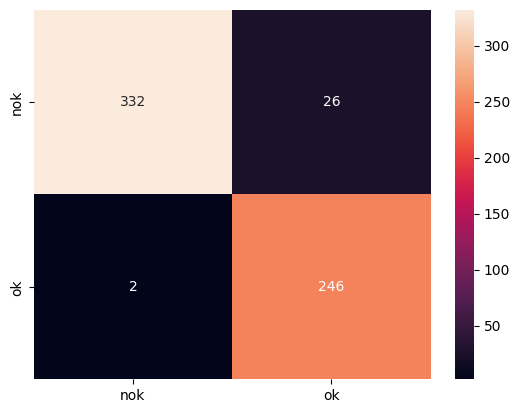

In [ ]:
# Make confusion matrix prettier

import seaborn as sns

sns.heatmap(cm, annot=True, xticklabels=train_data.class_names, yticklabels=train_data.class_names, fmt="g")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_labels, y_pred=pred_classes))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       358
         1.0       0.90      0.99      0.95       248

    accuracy                           0.95       606
   macro avg       0.95      0.96      0.95       606
weighted avg       0.96      0.95      0.95       606



In [ ]:
if y_pred[1] > 0.9917:
   model.save('yee_model_100.h5')
   print("I saved the model!")

In [ ]:
# model.save('bubbi_model_100.h5')

In [ ]:
!gdown "15ns9ba-7XrtwaFuZPInR162D4853srtt"

Downloading...
From: https://drive.google.com/uc?id=15ns9ba-7XrtwaFuZPInR162D4853srtt
To: /content/bubbi_model_100.h5
100% 4.88M/4.88M [00:00<00:00, 21.5MB/s]


In [ ]:
# Load the saved model
best_model = tf.keras.models.load_model('/content/bubbi_model_100.h5')

In [ ]:
best_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d_2 (Cropping2D)   (None, 448, 448, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 448, 448, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 446, 446, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 223, 223, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 221, 221, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                  

In [ ]:
# Check and see the loaded model performance
new_y_pred = best_model.evaluate(test_data)

19/19 [==============================] - 6s 319ms/step - loss: 0.0452 - accuracy: 0.9917


In [ ]:
# Make a prediction
new_preds_probs = best_model.predict(test_data, verbose=1) # set verborsity to see how long is left

19/19 [==============================] - 5s 262ms/step


In [ ]:
import numpy as np

# Rounded the prediction
new_pred_classes = np.round(new_preds_probs)

In [ ]:
# Make a confusion matrix
new_cm = confusion_matrix(y_pred=new_pred_classes, y_true=y_labels)
new_cm

array([[353,   5],
       [  0, 248]])

<Axes: >

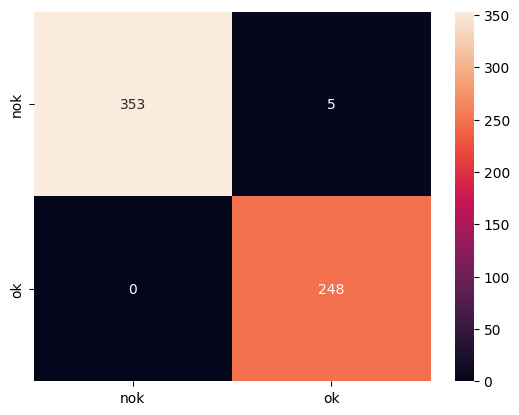

In [ ]:
# Make confusion matrix prettier

import seaborn as sns

sns.heatmap(new_cm, annot=True, xticklabels=train_data.class_names, yticklabels=train_data.class_names, fmt="g")

In [ ]:
# Make a new classification report
print(classification_report(y_true=y_labels, y_pred=new_pred_classes))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       358
         1.0       0.98      1.00      0.99       248

    accuracy                           0.99       606
   macro avg       0.99      0.99      0.99       606
weighted avg       0.99      0.99      0.99       606



In [ ]:
img = tf.io.read_file("/content/0003272820_DispensePost.bmp") # Read the file
img = tf.io.decode_image(img, channels=3) # Decode the read file
img = tf.image.resize(images=img, size=(512,512)) # Resize it should equal to the input shape in this case (512, 512)
input_file = tf.expand_dims(img, axis=0)
test_predict = best_model.predict(input_file, verbose=1)
test_predict = np.round(test_predict)
plt.imshow(img/255)
if test_predict == 1:
  plt.title("Nincs bubi")
else:
  plt.title("Bubis")

NotFoundError: ignored